In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df = pd.read_csv('data/h&mdataset/articles.csv')
df = df.drop(columns=['article_id','prod_name','product_code','product_type_no','department_no', 'index_code', 	
       'product_type_name', 'product_group_name',
       'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name', 'detail_desc'])

In [3]:
df.head()

,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,index_group_no,section_no,garment_group_no
0,1010016,9,4,5,1,16,1002
1,1010016,10,3,9,1,16,1002
2,1010017,11,1,9,1,16,1002
3,1010016,9,4,5,1,61,1017
4,1010016,10,3,9,1,61,1017


In [4]:
#train test split on the data
train, test = train_test_split(df, test_size=0.1)

In [5]:
scaler = StandardScaler()
df_scaled_train = pd.DataFrame(scaler.fit_transform(train), columns=df.columns)
train_np = df_scaled_train.to_numpy()

100%|██████████| 24/24 [08:40<00:00, 21.71s/it]


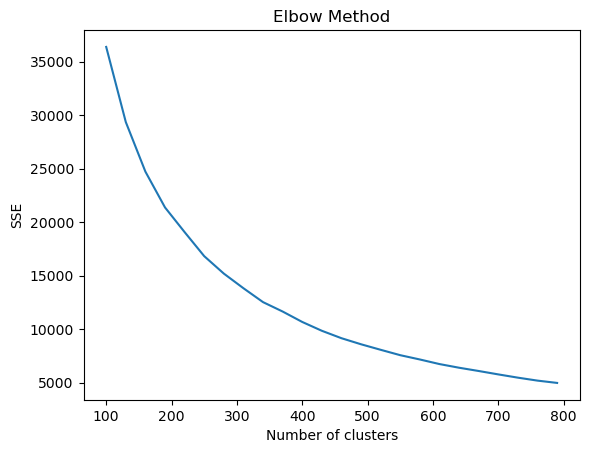

In [6]:
# Do a clustering on the data, for multiple number of cluster and plot the elbow curve

sse = []
range = range(100, 800, 30)
for i in tqdm(range):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(train_np)
    sse.append(kmeans.inertia_)


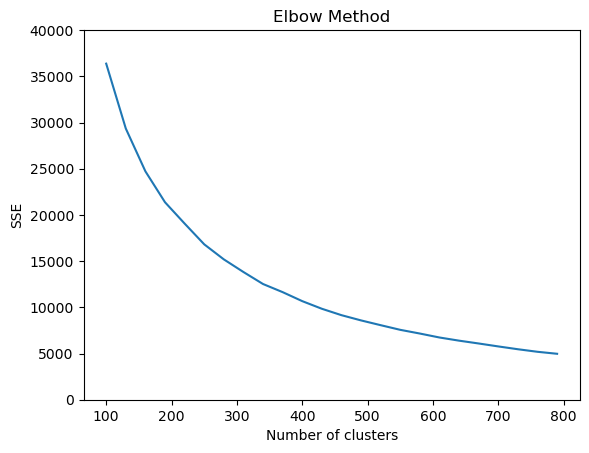

In [9]:
plt.plot(range, sse)
plt.title('Elbow Method')
#start y from 0
plt.ylim(0, 40000)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.savefig('elbow_curve_tab.png')
plt.show()

#Save the elbow curve plot as a file

In [ ]:
#Define the final number of clusters

num_clusters = 300

#Fit the model with the final number of clusters
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

kmeans.fit(train_np)

#Save the model as a file
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')

#Save the scaler as a file
joblib.dump(scaler, 'scaler.pkl')